# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


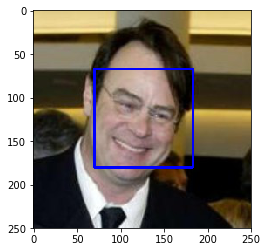

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [37]:
from tqdm import tqdm


#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
detected_human_count = 0
for file in human_files_short:
    if face_detector(file):
        detected_human_count += 1
print('Face detected rate for humans is: %d/%d'%(detected_human_count, 100 ))

detected_human_count = 0
for file in dog_files_short:
    if face_detector(file):
        detected_human_count += 1
print('Face detected rate for dogs is: %d/%d'%(detected_human_count, 100 ))


Face detected rate for humans is: 98/100
Face detected rate for dogs is: 17/100


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 71837260.91it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image, ImageFile
import torchvision.transforms as transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_image(img_path, shape=224):
    image = Image.open(img_path).convert('RGB')

    transform = transforms.Compose([
        transforms.Resize((shape,shape)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225)),
    ])
    image = transform(image)
    image = image[:3,:,:]
    
    return image

load_image(dog_files[0]).size()    

torch.Size([3, 224, 224])

In [9]:

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = load_image(img_path).to(device)
    input = image.unsqueeze(0)
    
    
    output = VGG16(input)
    
    _, pred = torch.max(output,1)
    
    
    return pred.item() # predicted class index

pred_index = VGG16_predict(human_files[0])
pred_index

906

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path

def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return index >= 151 and index <= 268 # true/false

dog_detector(dog_files[0])
dog_detector(human_files[0])

print(dog_files[50:])

['/data/dog_images/train/103.Mastiff/Mastiff_06868.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06821.jpg'
 '/data/dog_images/train/103.Mastiff/Mastiff_06869.jpg' ...,
 '/data/dog_images/valid/100.Lowchen/Lowchen_06682.jpg'
 '/data/dog_images/valid/100.Lowchen/Lowchen_06708.jpg'
 '/data/dog_images/valid/100.Lowchen/Lowchen_06684.jpg']


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_count = 0
for file in human_files_short:
    if dog_detector(file):
        detected_count += 1
print('Dog detected rate for humans is: %d/%d'%(detected_count, 100 ))

detected_count = 0
for file in dog_files_short:
    if dog_detector(file):
        detected_count += 1
print('Dog detected rate for dogs is: %d/%d'%(detected_count, 100 ))


Dog detected rate for humans is: 1/100
Dog detected rate for dogs is: 100/100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [29]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), 
                         (0.229, 0.224, 0.225)),
])
batch_size = 20
num_workers = 0
data_dir = '/data/dog_images/'
dataset_names = ['train','valid','test']
dog_datasets = {}
dataset_loaders = {}
for name in dataset_names:
    image_dir = os.path.join(data_dir, f'{name}/')
    data = datasets.ImageFolder(image_dir, transform=transform)
    loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
    dog_datasets[name] = data
    dataset_loaders[name] = loader



In [12]:
print('data_loaders: ', dataset_loaders)
print('size of train data: ', len(dataset_loaders['train']))
print('size of valid data: ', len(dataset_loaders['valid']))
print('size of test data: ', len(dataset_loaders['test']))

data_loaders:  {'train': <torch.utils.data.dataloader.DataLoader object at 0x7fc88c054da0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7fc88c054eb8>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fc88c054f98>}
size of train data:  334
size of valid data:  42
size of test data:  42


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* 我用拉伸作为缩放方式。使用 (3,224,224) 大小作为输入，因为在 torchvision.models 的[文档](https://pytorch.org/docs/stable/torchvision/models.html)中说，输入大小至少要有 224。我们没有 flatten 图像，而是用3个通道的2维矩阵来表示图像，因为这样可以让图像特征的位置信息得意保留。
* 我试用了「水平翻转」和「旋转」来对图片进行增强，因为这样可以让模型更加关注于图像特征，而非角度特征。

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

先计算一下总共有多少种狗的品种：

In [12]:
maxTargets = []
for batch_idx, (data, target) in enumerate(dataset_loaders['train']):
    maxTargets.append(torch.max(target))

In [27]:
for batch_idx, (data, target) in enumerate(dataset_loaders['valid']):
    maxTargets.append(torch.max(target))
for batch_idx, (data, target) in enumerate(dataset_loaders['test']):
    maxTargets.append(torch.max(target))

In [28]:
import numpy as np

# max target value
np.max([a.item() for a in maxTargets])

132

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
            
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        
        self.fc1 = nn.Linear(64 * 28 * 28, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.2)

    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 28 * 28)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)        
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### step 1
1. 先构建3个卷积层，最终得到 64 个特征层
2. 本来想每一个池化层让 size 减半，但是发现全链层的输入数据 size 过大。所以最后一个池化层让 size 除以 4。
3. 为了避免过拟合，我增加了一个丢失率为 15% 的 dropout 层
4. 因为最终有 133 个 bread，最终输出 size 是 133 。

### step 2

观测到训练过程中 loss 降低非常慢，所以将 SGD 的 lr 做了调整：0.01 => 0.05。

结果：loss 降低速度略微增加，但仍然很慢。avag loss = 4.45, accuracy = 4%

### step 3

1. pool2 step: 2 => 4
2. fc1 output size: 1024 => 4096
3. fc2 output size: 256 => 512
4. dropout.p: 0.15 => 0.05

结果：loss 降低速度更慢了，几乎不动。感觉调整方向错误了，应该减少 parameter 数量。

### step 4

1. fc1 output size: 4096 => 512
2. fc2 output size: 512 => 256
3. dropout.p: 0.05 => 0.15

结果：loss 降低速度毫无变化。

### step 5

感觉之前的调整方向不对。再往回调整：

1. pool2 step: 2
2. fc1 output size: 4096
3. fc2 output size: 512
4. dropout.p: 0.15 => 0.05

结果：
* loss 稳定降低，速度稍微增加。 
* 训练 8 个 epoch 后，train_loss 降低到 3.8，但是 valid_loss 却增加了，出现了过拟合现象。
* 10 个 epoch 后，valid_loss 降低到 3.95。accuracy 提高到 9%


### step 6

考虑到 出现一些过拟合，我将 dropout.p 提高到 0.2

结果：
* 5 个 epoch 后，accuracy 提高到 11%



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
loaders_scratch = dataset_loaders
valid_loss_min = np.Inf

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    global valid_loss_min
       
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
#             print(f'batch_index:{batch_idx}, len: {len(data)}, data.size:{data.size()}, target.size:{target.size()}')
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            optimizer.zero_grad()
            output = model(data)
            
#             print(f'output.size:{output.size()}, target.size:{target.size()}')
            loss = criterion(output, target)
            
            ## find the loss and update the model parameters accordingly
            loss.backward()
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += (loss.data-train_loss)/(batch_idx+1)
            
            if batch_idx % 20 == 19:
                print(f'Epoch: {epoch} \tBatch idx: {batch_idx} \t Curr Loss: {loss.data} \tAvrg loass: {train_loss}')
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            
            loss = criterion(output, target)

            valid_loss += (loss.data-valid_loss)/(batch_idx+1)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model


In [17]:
model_scratch.dropout = nn.Dropout(0.2)

In [42]:
# train the model
model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Batch idx: 0 	 Curr Loss: 3.7447516918182373 	Avrg loass: 3.7447516918182373
Epoch: 1 	Batch idx: 1 	 Curr Loss: 2.866457939147949 	Avrg loass: 3.305604934692383
Epoch: 1 	Batch idx: 2 	 Curr Loss: 2.96630597114563 	Avrg loass: 3.192505359649658
Epoch: 1 	Batch idx: 3 	 Curr Loss: 3.2849831581115723 	Avrg loass: 3.2156248092651367
Epoch: 1 	Batch idx: 4 	 Curr Loss: 3.111168146133423 	Avrg loass: 3.1947333812713623
Epoch: 1 	Batch idx: 5 	 Curr Loss: 2.9746665954589844 	Avrg loass: 3.158055543899536
Epoch: 1 	Batch idx: 6 	 Curr Loss: 3.1067657470703125 	Avrg loass: 3.150728464126587
Epoch: 1 	Batch idx: 7 	 Curr Loss: 2.9924721717834473 	Avrg loass: 3.130946397781372
Epoch: 1 	Batch idx: 8 	 Curr Loss: 2.94673228263855 	Avrg loass: 3.110478162765503
Epoch: 1 	Batch idx: 9 	 Curr Loss: 2.455005168914795 	Avrg loass: 3.044930934906006
Epoch: 1 	Batch idx: 10 	 Curr Loss: 2.777574300765991 	Avrg loass: 3.0206258296966553
Epoch: 1 	Batch idx: 11 	 Curr Loss: 2.46476674079895 	Av

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [46]:

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.016365


Test Accuracy: 11% (97/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False

n_classes = 133
n_inputs = vgg16.classifier[6].in_features
last_layer = nn.Linear(n_inputs, n_classes)
vgg16.classifier[6] = last_layer

model_transfer = vgg16

if use_cuda:
    model_transfer = model_transfer.cuda()

In [23]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
1. VGG16 有着简单的结构，并且在 ImageNet 竞赛中成绩优异，所以我想选择 VGG16 作为此次项目的结构。
2. 选择这个模型是因为 VGG16 的训练模型主要也是动物和一些日常可以见到的物品，跟我们现在要进行的训练种类很相似。
3. 因为我们这个项目的训练集不是很大，只有 8000 个，所以，不适合从头开始训练。所以，我先尝试只对最后一层进行训练。
4. 最终，训练 6 个 epoch 后，结果已经很不错了。


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [45]:
n_epochs = 10

In [24]:
valid_loss_min = np.Inf

In [ ]:
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Batch idx: 19 	 Curr Loss: 0.5276245474815369 	Avrg loass: 0.4746103286743164
Epoch: 1 	Batch idx: 39 	 Curr Loss: 0.19271111488342285 	Avrg loass: 0.48929011821746826
Epoch: 1 	Batch idx: 59 	 Curr Loss: 0.4032798707485199 	Avrg loass: 0.4969068169593811
Epoch: 1 	Batch idx: 79 	 Curr Loss: 0.6394544839859009 	Avrg loass: 0.5083228945732117
Epoch: 1 	Batch idx: 99 	 Curr Loss: 0.5871952176094055 	Avrg loass: 0.5138325691223145
Epoch: 1 	Batch idx: 119 	 Curr Loss: 0.6192633509635925 	Avrg loass: 0.5202672481536865
Epoch: 1 	Batch idx: 139 	 Curr Loss: 0.3366813063621521 	Avrg loass: 0.5237273573875427
Epoch: 1 	Batch idx: 159 	 Curr Loss: 0.46133407950401306 	Avrg loass: 0.5227423906326294
Epoch: 1 	Batch idx: 179 	 Curr Loss: 0.8037120699882507 	Avrg loass: 0.5215715765953064
Epoch: 1 	Batch idx: 199 	 Curr Loss: 0.2760557532310486 	Avrg loass: 0.5156625509262085
Epoch: 1 	Batch idx: 219 	 Curr Loss: 0.27068012952804565 	Avrg loass: 0.5104346871376038
Epoch: 1 	Batch idx: 2

In [25]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [47]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.505306


Test Accuracy: 85% (714/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
dog_datasets['train'].classes

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dog_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = load_image(img_path).to(device)
    input = image.unsqueeze(0)
    
    output = model_transfer(input)
    
    _, pred = torch.max(output,1) 
    
    index = pred.item() # predicted class index
    
    name = class_names[index]
    
    return name

In [32]:
dog_files[50:]

array(['/data/dog_images/train/103.Mastiff/Mastiff_06868.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06821.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06869.jpg', ...,
       '/data/dog_images/valid/100.Lowchen/Lowchen_06682.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06708.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06684.jpg'], 
      dtype='<U106')

In [33]:
len(dog_files)

8351

In [34]:
print('bread of file %s is %s'%(dog_files[30], predict_breed_transfer(dog_files[30])))
print('bread of file %s is %s'%(dog_files[1200], predict_breed_transfer(dog_files[1200])))
print('bread of file %s is %s'%(dog_files[5000], predict_breed_transfer(dog_files[5000])))

bread of file /data/dog_images/train/103.Mastiff/Mastiff_06818.jpg is Mastiff
bread of file /data/dog_images/train/104.Miniature_schnauzer/Miniature_schnauzer_06922.jpg is Petit basset griffon vendeen
bread of file /data/dog_images/train/040.Bulldog/Bulldog_02823.jpg is Bulldog


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [42]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if(dog_detector(img_path)):
        bread = predict_breed_transfer(img_path)
        return 'Dog is detected! The bread is: %s.'%(bread)
    elif(face_detector(img_path)):
        bread = predict_breed_transfer(img_path)
        return 'Human is detected! He is like: %s.'%(bread)
    else:
        return 'Nothing detected.'


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. 对训练集做一些 Augmention，比如裁剪和旋转。
2. 换成更复杂的模型，比如 GoogLeNet，来增加准确率。
3. 在做迁移学习的时候，可适当的将后面的卷基层也做一些更新，来让模型更加适应小狗分类这个任务。

In [44]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:6], dog_files[:6])):
    print('Result of {} is: [{}]'.format(file, run_app(file)))
    

Result of /data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg is: [Human is detected! He is like: Welsh springer spaniel.]
Result of /data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg is: [Human is detected! He is like: Dachshund.]
Result of /data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg is: [Human is detected! He is like: Bearded collie.]
Result of /data/lfw/Donald_Carty/Donald_Carty_0001.jpg is: [Human is detected! He is like: Bull terrier.]
Result of /data/lfw/Barry_Switzer/Barry_Switzer_0001.jpg is: [Human is detected! He is like: Italian greyhound.]
Result of /data/lfw/Jeong_Se-hyun/Jeong_Se-hyun_0003.jpg is: [Human is detected! He is like: Alaskan malamute.]
Result of /data/dog_images/train/103.Mastiff/Mastiff_06833.jpg is: [Dog is detected! The bread is: Bullmastiff.]
Result of /data/dog_images/train/103.Mastiff/Mastiff_06826.jpg is: [Dog is detected! The bread is: Mastiff.]
Result of /data/dog_images/train/103.Mastiff/Mastiff_06871.jpg is: [Dog is detected! The bread is: Bullmastiff.]